# Everyone Can Learn Python Scholarship

## 1️⃣ Python 🐍 - CO2 Emissions

Now let's now move on to the competition and challenge.

## 📖 Background
You volunteer for a public policy advocacy organization in Canada, and your colleague asked you to help her draft recommendations for guidelines on CO2 emissions rules. 

After researching emissions data for a wide range of Canadian vehicles, she would like you to investigate which vehicles produce lower emissions.

## 💾 The data I

### You have access to seven years of CO2 emissions data for Canadian vehicles ([source](https://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64#wb-auto-6)):

- "Make" - The company that manufactures the vehicle.
- "Model" - The vehicle's model.
- "Vehicle Class" - Vehicle class by utility, capacity, and weight.
- "Engine Size(L)" - The engine's displacement in liters.
- "Cylinders" - The number of cylinders.
- "Transmission" - The transmission type: A = Automatic, AM = Automatic Manual, AS = Automatic with select shift, AV = Continuously variable, M = Manual, 3 - 10 = the number of gears.
- "Fuel Type" - The fuel type: X = Regular gasoline, Z = Premium gasoline, D = Diesel, E = Ethanol (E85), N = natural gas.
- "Fuel Consumption Comb (L/100 km)" - Combined city/highway (55%/45%) fuel consumption in liters per 100 km (L/100 km).
- "CO2 Emissions(g/km)" - The tailpipe carbon dioxide emissions in grams per kilometer for combined city and highway driving. 

The data comes from the Government of Canada's open data [website](https://open.canada.ca/en).

In [20]:
# Import the pandas and numpy packages
import pandas as pd
import numpy as np

# Load the data
cars = pd.read_csv('data/co2_emissions_canada.csv')

# create numpy arrays
cars_makes = cars['Make'].to_numpy()
cars_models = cars['Model'].to_numpy()
cars_classes = cars['Vehicle Class'].to_numpy()
cars_engine_sizes = cars['Engine Size(L)'].to_numpy()
cars_cylinders = cars['Cylinders'].to_numpy()
cars_transmissions = cars['Transmission'].to_numpy()
cars_fuel_types = cars['Fuel Type'].to_numpy()
cars_fuel_consumption = cars['Fuel Consumption Comb (L/100 km)'].to_numpy()
cars_co2_emissions = cars['CO2 Emissions(g/km)'].to_numpy()

# Preview the dataframe
cars

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,8.5,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,9.6,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,5.9,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,11.1,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,10.6,244
...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,9.4,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,9.9,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,10.3,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,9.9,232


In [21]:
# Look at the first ten items in the CO2 emissions array
cars_co2_emissions[:10]

array([196, 221, 136, 255, 244, 230, 232, 255, 267, 212])

1. What is the median engine size in liters?

Median engine size is 3.0 Liters.

In [22]:
str(pd.Series(cars_engine_sizes).median()) +' Liters'

'3.0 Liters'

2. What is the average fuel consumption for regular gasoline (Fuel Type = X), premium gasoline (Z), ethanol (E), and diesel (D)?  

In [23]:
df = pd.DataFrame(cars.groupby('Fuel Type')['Fuel Consumption Comb (L/100 km)'].mean())
df['fuel_types'] = ['Diesel','Ethanol','Natural gas','Regular gasoline','Premium gasoline']
df.set_index('fuel_types', drop=True)

,Fuel Consumption Comb (L/100 km)
fuel_types,
Diesel,8.835429
Ethanol,16.861351
Natural gas,12.700000
Regular gasoline,10.084575
Premium gasoline,11.422767


3. What is the correlation between fuel consumption and CO2 emissions?

Correlation score is 0.92, which means there is a highly positive correlation between fuel comsumption and CO2 emissions. If we combine general knowledge with this score we can say that fuel consumption causes CO2 emissions.

0.9180515723870857


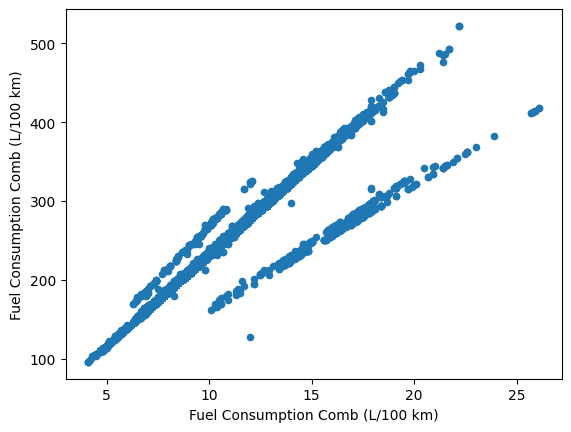

In [24]:
cars.plot.scatter(x='Fuel Consumption Comb (L/100 km)',y='CO2 Emissions(g/km)',xlabel='Fuel Consumption Comb (L/100 km)',ylabel='Fuel Consumption Comb (L/100 km)')
print(cars[['CO2 Emissions(g/km)','Fuel Consumption Comb (L/100 km)']].corr()['CO2 Emissions(g/km)']['Fuel Consumption Comb (L/100 km)'])


4. Which vehicle class has lower average CO2 emissions, 'SUV - SMALL' or 'MID-SIZE'? 

Mid-size cars cause lower CO2 emissions than SUV - small cars generally.

In [25]:
cars.groupby('Vehicle Class')['CO2 Emissions(g/km)'].mean().sort_values()[['MID-SIZE','SUV - SMALL']]

Vehicle Class
MID-SIZE       222.455428
SUV - SMALL    236.292523
Name: CO2 Emissions(g/km), dtype: float64

5. What are the average CO2 emissions for all vehicles? For vehicles with an engine size of 2.0 liters or smaller?

Meanwhile average CO2 emission for all vehicles is 250.58g/km,
average CO2 emission for vehicles with an engine size of 2.0 liters or smaller is  198.27g/km.


In [26]:
print('Average CO2 emission for all vehicles: ',cars['CO2 Emissions(g/km)'].mean(),'g/km'
      '\nAverage CO2 emission for vehicles with an engine size of 2.0 liters or smaller: ',cars[cars['Engine Size(L)']<=2.0]['CO2 Emissions(g/km)'].mean(),'g/km')

Average CO2 emission for all vehicles:  250.58469871360867 g/km
Average CO2 emission for vehicles with an engine size of 2.0 liters or smaller:  198.26783530370975 g/km


## 2️⃣ SQL - Understanding the bicycle market 

## 📖 Background
You work for a chain of bicycle stores. Your new team leader comes from a different industry and wants your help learning about the bicycle market. Specifically, they need to understand better the brands and categories for sale at your stores.

## 💾 The data II

### You have access to the following tables:

#### products
- "product_id" - Product identifier.
- "product_name" - The name of the bicycle.
- "brand_id" - You can look up the brand's name in the "brands" table.
- "category_id" - You can look up the category's name in the "categories" table.
- "model_year" - The model year of the bicycle.
- "list_price" - The price of the bicycle.

#### brands
- "brand_id" - Matches the identifier in the "products" table.
- "brand_name" - One of the nine brands the store sells.

#### categories
- "category_id" - Matches the identifier in the "products" table.
- "category_name" - One of the seven product categories in the store.

## A note on SQL
You can click the "Browse tables" button in the upper right-hand corner of the SQL cell below to view the available tables. They will show on the left of the notebook.

It is also important to note that the database used in this challenge is a slightly different version (SQL Server) from the one used in the Introduction to SQL course (PostgreSQL). You might notice that the keyword **LIMIT** does not exist in SQL Server.

In [27]:
SELECT * 
FROM products;

,product_id,product_name,brand_id,category_id,model_year,list_price
0,1,Trek 820 - 2016,9,6,2016,379.99
1,2,Ritchey Timberwolf Frameset - 2016,5,6,2016,749.99
2,3,Surly Wednesday Frameset - 2016,8,6,2016,999.99
3,4,Trek Fuel EX 8 29 - 2016,9,6,2016,2899.99
4,5,Heller Shagamaw Frame - 2016,3,6,2016,1320.99
...,...,...,...,...,...,...
316,317,Trek Checkpoint ALR 5 - 2019,9,7,2019,1999.99
317,318,Trek Checkpoint ALR 5 Women's - 2019,9,7,2019,1999.99
318,319,Trek Checkpoint SL 5 Women's - 2019,9,7,2019,2799.99
319,320,Trek Checkpoint SL 6 - 2019,9,7,2019,3799.99


In [28]:
SELECT * FROM brands;

,brand_id,brand_name
0,1,Electra
1,2,Haro
2,3,Heller
3,4,Pure Cycles
4,5,Ritchey
5,6,Strider
6,7,Sun Bicycles
7,8,Surly
8,9,Trek


In [29]:
SELECT * FROM categories

,category_id,category_name
0,1,Children Bicycles
1,2,Comfort Bicycles
2,3,Cruisers Bicycles
3,4,Cyclocross Bicycles
4,5,Electric Bikes
5,6,Mountain Bikes
6,7,Road Bikes


1. What is the most expensive item your company sells? The least expensive?

Our most expensive item is 'Trek Domane SLR 9 Disc - 2018' which is 11999.99 dollars and our least expensive item is 'Strider Classic 12 Balance Bike - 2018' which is only 89.99 dollars.

In [30]:
SELECT *
FROM products
WHERE list_price = (SELECT MAX(list_price) FROM products) or list_price = (SELECT MIN(list_price) FROM products)

,product_id,product_name,brand_id,category_id,model_year,list_price
0,155,Trek Domane SLR 9 Disc - 2018,9,7,2018,11999.99
1,263,Strider Classic 12 Balance Bike - 2018,6,1,2018,89.99


2. How many different products of each category does your company sell?)

In [31]:
SELECT brands.brand_name, salecount as 'Sale Count'
FROM (SELECT brand_id, COUNT(*) as salecount FROM products GROUP BY brand_id) as products
INNER JOIN brands on products.brand_id=brands.brand_id


,brand_name,Sale Count
0,Electra,118
1,Haro,10
2,Heller,3
3,Pure Cycles,3
4,Ritchey,1
5,Strider,3
6,Sun Bicycles,23
7,Surly,25
8,Trek,135


3. What are the top three brands with the highest average list price? The top three categories?

In [32]:
SELECT brands.brand_name, avg_list_price as 'Average list price'
FROM (SELECT brand_id, AVG(list_price) as avg_list_price 
      FROM products 
      GROUP BY brand_id) as products
INNER JOIN brands on products.brand_id=brands.brand_id
ORDER BY avg_list_price DESC
OFFSET 0 ROWS FETCH FIRST 3 ROWS ONLY;

,brand_name,Average list price
0,Trek,2500.064074
1,Heller,2172.996666
2,Surly,1331.753600


In [33]:
SELECT categories.category_name, avg_list_price as 'Average list price'
FROM (SELECT category_id, AVG(list_price) as avg_list_price 
      FROM products 
      GROUP BY category_id) as products
INNER JOIN categories on products.category_id=categories.category_id
ORDER BY avg_list_price DESC
OFFSET 0 ROWS FETCH FIRST 3 ROWS ONLY;

,category_name,Average list price
0,Electric Bikes,3281.656666
1,Road Bikes,3175.357333
2,Cyclocross Bicycles,2542.793000
